<a href="https://colab.research.google.com/github/burcia1711/word-order-simulation/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTS AND OTHER FUNCTIONALITIES**

In [ ]:
import random
from copy import deepcopy 
from numpy.random import normal
import numpy
from scipy.stats import beta
from scipy.special import logsumexp
from math import log, log1p, exp

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

personalities = ['F', 'S'] #F for flexible, S for stubborn

sentence_type = ['reversible', 'irreversible']
sentence_weights = [7, 3]

basic_orders = ['SOV', 'SVO', 'OSV', 'OVS', 'VSO', 'VOS']

start = 0
stop = 2



## **LANGUAGE**

There are different types of languages (logical, agglutinative, etc.). So, if a languagua evolve one of them, then there will be consequences accordingly.


In [ ]:
class Language:
  def __init__(self, typ, age, pop):
    self.typ = typ
    self.age = age
    self.population = pop

## **AGENTS**

Agents are humans, they have:

*   generation number (1st, 2nd, 10th, etc.) 
*   personality type (stubborn or flexible)
*   is affected by any other languge (1 is for True, 0 is for False)



In [ ]:
class Agent:

  def __init__(self, g, p, l):
    self.generation = g
    self.personality = p
    self.ling = l



In [ ]:
#create agents (humans :D)
def make_agent(agent):
    return [agent.generation, agent.personality, agent.ling]

## **POPULATIONS**

Populations are based on number of people (N) in a particular generation

In [ ]:
def make_agents(N, G):
    gen = G
    population = []

    for i in range(N): 
        l = random.randint(0,1)
        p = random.randint(0,1)
        agent = Agent(gen, personalities[p], l)
        population.append(make_agent(agent))

    return population


# Check that this works by making a population of 8 agents

make_agents(8,0)


[[0, 'F', 0],
 [0, 'F', 0],
 [0, 'F', 1],
 [0, 'S', 0],
 [0, 'F', 0],
 [0, 'F', 0],
 [0, 'S', 1],
 [0, 'F', 0]]

In [ ]:
def create_population(starting_pop, n_generations):
  people_in_population = []
  for i in range(n_generations): 
    if i == 0:
      people_in_population.extend(make_agents(starting_pop, i))
    else:
      people_in_population.extend(make_agents(int(len(people_in_population)*(random.randrange(start, stop+1)+0.3)), i))
    print(len(people_in_population))

  print(people_in_population)
    
create_population(5, 10)
  

5
11
25
32
41
53
68
88
290
667
[[0, 'S', 0], [0, 'S', 1], [0, 'S', 0], [0, 'S', 1], [0, 'S', 0], [1, 'F', 1], [1, 'S', 0], [1, 'F', 0], [1, 'F', 0], [1, 'F', 1], [1, 'F', 0], [2, 'F', 0], [2, 'S', 1], [2, 'F', 0], [2, 'F', 1], [2, 'S', 0], [2, 'S', 0], [2, 'F', 1], [2, 'S', 1], [2, 'S', 1], [2, 'F', 0], [2, 'S', 1], [2, 'S', 0], [2, 'S', 0], [2, 'S', 0], [3, 'S', 0], [3, 'F', 1], [3, 'F', 0], [3, 'S', 1], [3, 'F', 1], [3, 'S', 1], [3, 'S', 0], [4, 'F', 1], [4, 'S', 1], [4, 'S', 0], [4, 'F', 0], [4, 'F', 0], [4, 'S', 1], [4, 'S', 1], [4, 'F', 1], [4, 'F', 0], [5, 'S', 1], [5, 'F', 1], [5, 'F', 0], [5, 'F', 0], [5, 'F', 1], [5, 'F', 1], [5, 'S', 0], [5, 'S', 1], [5, 'F', 0], [5, 'S', 0], [5, 'S', 0], [5, 'S', 0], [6, 'F', 0], [6, 'F', 1], [6, 'S', 1], [6, 'S', 0], [6, 'F', 0], [6, 'F', 1], [6, 'F', 1], [6, 'F', 0], [6, 'S', 1], [6, 'S', 0], [6, 'S', 0], [6, 'F', 0], [6, 'F', 1], [6, 'S', 0], [6, 'F', 0], [7, 'S', 1], [7, 'F', 0], [7, 'S', 0], [7, 'S', 1], [7, 'F', 0], [7, 'F', 0], [7, 'F

## **WORD ORDER and SENTENCE GENERATION**



In [ ]:
WORD_ORDER_LIST = []

WORD_ORDER_LIST = random.choices(basic_orders, weights = [10, 7, 1, 1, 1, 1], k = 100)

In [ ]:
from collections import Counter
import pandas

def plot_freq_list(l):
  count = Counter(sorted(l))
  df = pandas.DataFrame.from_dict(count, orient='index')
  df.plot(kind='bar')


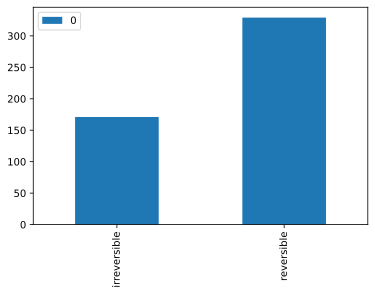

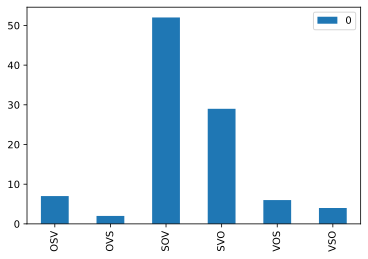

In [ ]:
def make_utterance(n):
  return random.choices(sentence_type, weights =sentence_weights, k = n)

utterence_list =[] 
utterence_list = make_utterance(500)

plot_freq_list(utterence_list)
plot_freq_list(WORD_ORDER_LIST)

# **INTERACTIONS**

In [ ]:
def choose_utterance(agent):   # sample from a normal distribution with SD=0.25 and mean of the teacher
    agent_utterance=normal(agent[0],.25)
    return agent_utterance

# Let's check that this works
# You can run this multiple times to see different chosen utterances for different agents

pop=make_population(4)
vowel = choose_utterance(pop[0])
print("The agent's mean was", pop[0][0])
print("The agent's chosen utterance is", vowel)